In [1]:
import os, json, glob, copy, shutil
import importlib
import torch
import torchvision 
import numpy as np
import scipy.stats as st
import PIL.Image
from datetime import datetime
from collections import OrderedDict
from config import get_train_config
import augmentation
import loaders
from models import RGBNet

# MobileNet

In [14]:
t = torchvision.transforms.Compose([
        GaussianBlur(r=1),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    ])

In [ ]:
mbn = torchvision.models.mobilenet_v2(pretrained=True)
mbn = mbn.eval()

with open('imagenet_class_index.json') as f:
    i2c = json.load(f)

In [40]:
pimg = PIL.Image.open(r'D:\tranduytrung\Mask_RCNN\images\7581246086_cf7bbb7255_z.jpg')
v, i = mbn(t(pimg).unsqueeze(0)).topk(10)
list([i2c[str(x)] for x in i.squeeze().numpy()])

[['n03388549', 'four-poster'],
 ['n03201208', 'dining_table'],
 ['n04344873', 'studio_couch'],
 ['n04239074', 'sliding_door'],
 ['n04081281', 'restaurant'],
 ['n04201297', 'shoji'],
 ['n03976657', 'pole'],
 ['n03535780', 'horizontal_bar'],
 ['n04380533', 'table_lamp'],
 ['n03018349', 'china_cabinet']]

# Transform

In [3]:
depth = loaders.depth_from_exr(r'D:\tranduytrung\rgbd-classification\data\gen\tag\tag.0014.depth.exr')

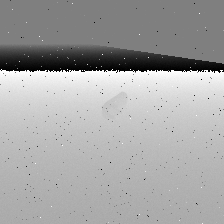

In [434]:
t = torchvision.transforms.Compose([
#         augmentation.CropAndResize((224,224), scale=(0.5, 1.0)),
        torchvision.transforms.ToTensor(),
        augmentation.DepthTranslate(minmax=(0, .8), exclude_gt=None),
        augmentation.GaussianNoise(std=0.005),
        augmentation.DepthUniformNoise(p=0.01, minmax=(0.15, 1.0)),
        augmentation.Clamp((0.15, 1.0)),
        torchvision.transforms.Normalize(mean=[0.575], std=[0.85])
    ])
dimage = t(depth)
torchvision.transforms.ToPILImage()(dimage)

In [390]:
importlib.reload(augmentation.depth_noise)
importlib.reload(augmentation)

<module 'augmentation' from 'D:\\tranduytrung\\rgbd-classification\\augmentation\\__init__.py'>

# Loader

In [60]:
importlib.reload(loaders.depth_loader)
importlib.reload(loaders)

<module 'loaders' from 'D:\\tranduytrung\\rgbd-classification\\loaders\\__init__.py'>

In [64]:
depth = loaders.depth_from_exr(r'D:\tranduytrung\rgbd-classification\data\gen\capot\capot.0014.depth.exr')
depth.shape

(224, 224, 1)

In [4]:
rgbd_data = loaders.rgbd_from_png_exr(
    r'D:\tranduytrung\rgbd-classification\data\gen\capot\capot.0014.rgb.png',
    r'D:\tranduytrung\rgbd-classification\data\gen\capot\capot.0014.depth.exr')

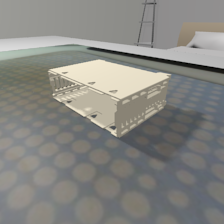

In [9]:
PIL.Image.fromarray((rgbd_data[...,:3]*255).astype(np.uint8))

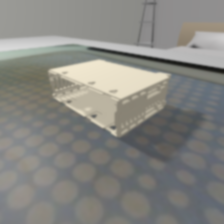

In [26]:
blurred = augmentation.GaussianBlur([1,1,1,0])(rgbd_data)
PIL.Image.fromarray((blurred[...,:3]*255).astype(np.uint8))